1. Data Loading and Exploration

In [26]:
#Loading dataset
import pandas as pd

data = pd.read_csv(r"C:\Users\rabia\Downloads\archive (3)\synthetic_beverage_sales_data.csv")

# Showing the first few rows
data.head(10)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23
5,ORD2,CUS2847,B2C,Sauvignon Blanc,Alcoholic Beverages,9.09,2,0.00,18.18,Schleswig-Holstein,2023-03-16
6,ORD3,CUS1806,B2B,Tomato Juice,Juices,2.14,44,0.10,84.74,Hamburg,2022-11-20
7,ORD3,CUS1806,B2B,Vittel,Water,0.43,13,0.05,5.31,Hamburg,2022-11-20
8,ORD3,CUS1806,B2B,San Pellegrino,Water,1.21,92,0.10,100.19,Hamburg,2022-11-20
9,ORD3,CUS1806,B2B,Evian,Water,1.38,3,0.05,3.93,Hamburg,2022-11-20


In [28]:
# Descriptive statistics
data.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


In [36]:
#Checking for data shape
data.shape

(8999910, 11)

2. Data Cleaning

In [38]:
#Checking for the number of missing values
data.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

From the above code we can see that there are no null values in the dataset

In [40]:
#Checking what the datatypes are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [47]:
#Checking for any duplicate values in the dataset
data.duplicated().sum()

0

In [58]:
# Standardizing the column names by removing leading or trailing spaces and switching all to lower case
data.columns = data.columns.str.strip()            # Removes leading/trailing space
data.columns = data.columns.str.lower()             # Converting the result to lowercase

print(data.columns)

Index(['order_id', 'customer_id', 'customer_type', 'product', 'category',
       'unit_price', 'quantity', 'discount', 'total_price', 'region',
       'order_date'],
      dtype='object')


 3. Sales Analysis

In [71]:
# Rank products by sales volume and identify the top 10

prod_sales = data.groupby('product')['total_price'].sum()

# Sort the Series by values directly (no 'by' needed)
prod_sales = prod_sales.sort_values(ascending=False)

# Get the top 10
top_10_prods = prod_sales.head(10)

# Display
print(top_10_prods)



product
Veuve Clicquot     2.025819e+08
Moët & Chandon     1.750881e+08
Johnnie Walker     9.726180e+07
Jack Daniels       9.588100e+07
Tanqueray          8.614366e+07
Bacardi            5.846750e+07
Havana Club        5.804696e+07
Sauvignon Blanc    2.331918e+07
Cranberry Juice    2.304483e+07
Riesling           2.266128e+07
Name: total_price, dtype: float64


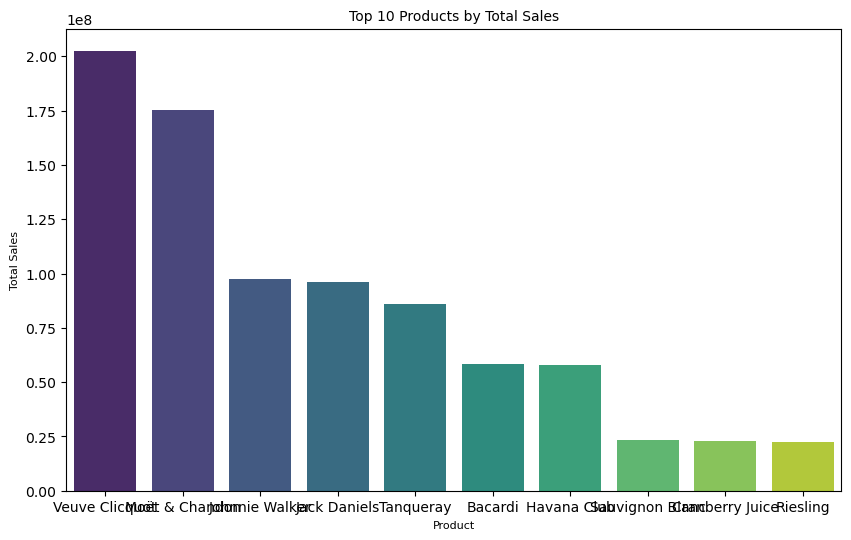

In [89]:
# Visualize the results using a bar chart
import matplotlib.pyplot as plt
import seaborn as sns


top_10_prods = prod_sales.head(10)

plt.figure(figsize=(10,6)) 

sns.barplot(x=top_10_prods.index, y=top_10_prods.values, palette='viridis')

plt.xlabel('Product', fontsize=8)
plt.ylabel('Total Sales', fontsize=8) 
plt.title('Top 10 Products by Total Sales', fontsize=10) 
plt.show() 

 4. Revenue Analysis

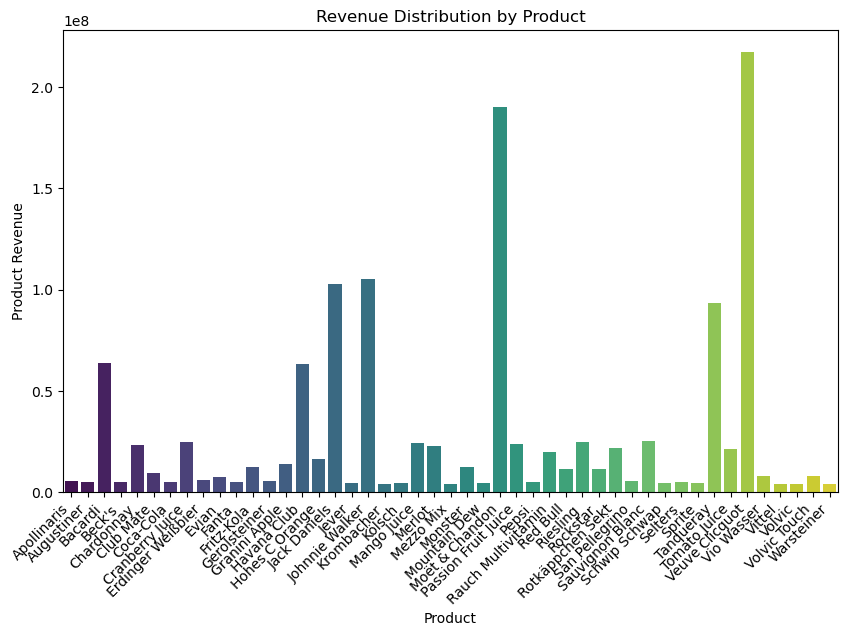

In [112]:
# Calculate total revenue for each sale (price * quantity)
data['total_revenue'] = data['unit_price'] * data['quantity']
prod_revenue = data.groupby('product')['total_revenue'].sum().reset_index()


#Visualize revenue distribution by product using a bar chart
plt.figure(figsize=(10,6))

sns.barplot(x='product', y='total_revenue', data=prod_revenue, palette='viridis')

plt.xlabel('Product')
plt.ylabel('Product Revenue')
plt.title('Revenue Distribution by Product')
plt.xticks(rotation=45, ha='right')
plt.show()

In [110]:
# Identify the products generating the highest revenue
prod_revenue.head(5)

,product,total_revenue
0,Apollinaris,5558057.11
1,Augustiner,5194811.32
2,Bacardi,63850576.20
3,Beck's,5064119.71
4,Chardonnay,23030410.04


 5. Time-Based Trends


In [123]:
# Convert date columns to a datetime format
data['order_date'] = pd.to_datetime(data['order_date'])
print(data['order_date'].dtype)

datetime64[ns]


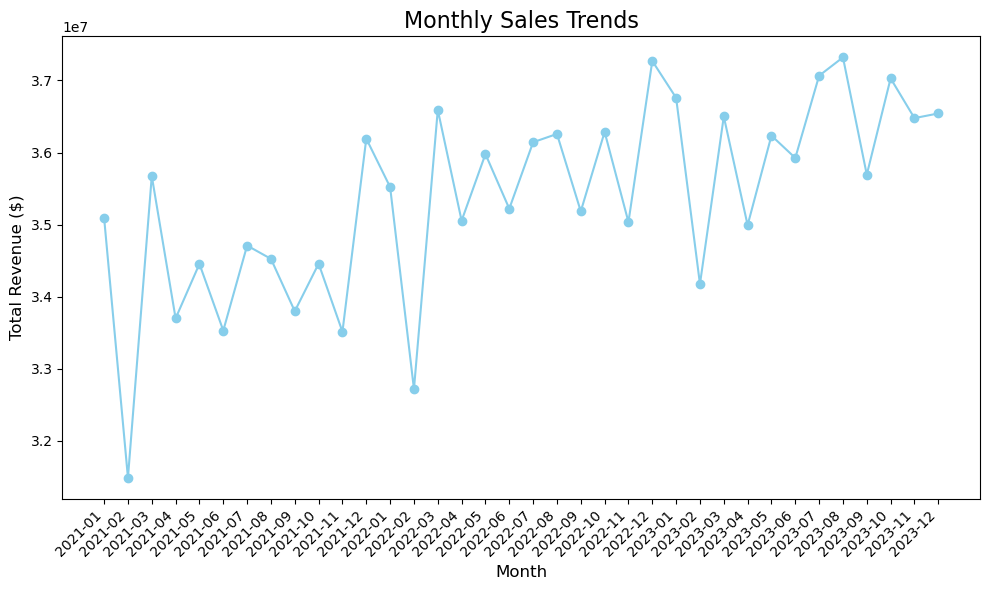

In [131]:
# Group sales data by month or week to identify trends
# Extract year and month from the Order_Date column
data['Year_Month'] = data['order_date'].dt.to_period('M')  # Period format for month

# Group by Year_Month and sum total revenue
monthly_sales = data.groupby('Year_Month')['total_revenue'].sum().reset_index()

# Visualize monthly sales trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Year_Month'].astype(str), monthly_sales['total_revenue'], marker='o', color='skyblue')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Monthly Sales Trends', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

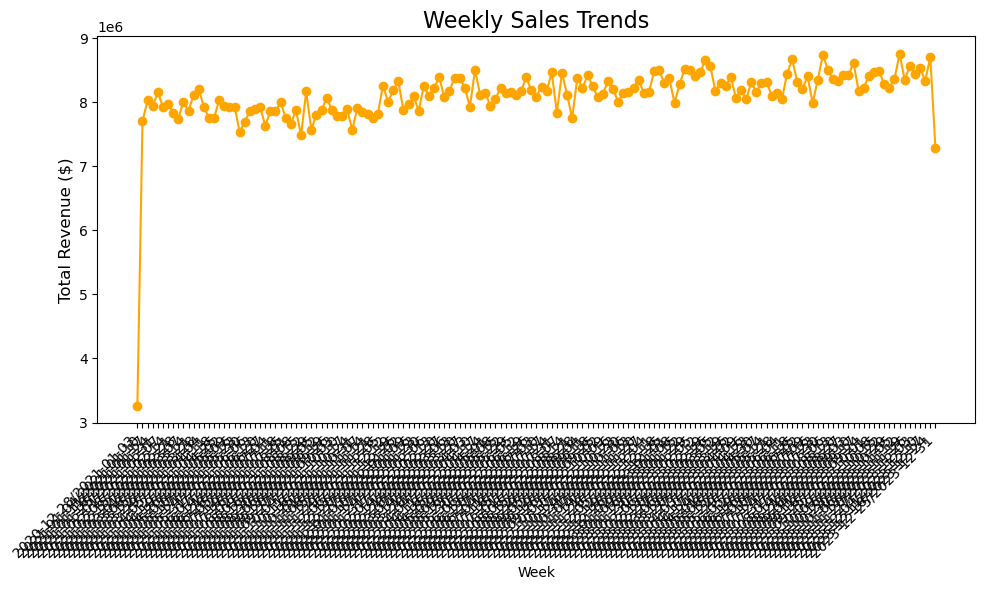

In [137]:
# Extract year and week number from Order_Date column
data['Year_Week'] = data['order_date'].dt.to_period('W')  # Period format for week

# Group by Year_Week and sum total revenue
weekly_sales = data.groupby('Year_Week')['total_revenue'].sum().reset_index()

# Visualize weekly sales trends
plt.figure(figsize=(10,6))
plt.plot(weekly_sales['Year_Week'].astype(str), weekly_sales['total_revenue'], marker='o', color='orange')
plt.xlabel('Week', fontsize=10)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Weekly Sales Trends', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()